In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
#file_path = os.path.join(project_root, 'src', 'data_handle', 'load_clean_first_look.py')
from src.data_handle.data_load import LoadData
from src.data_handle.first_look_and_clean import FirstLook
from src.data_handle.eda import ForexEDA
from src.features.indicators import TechnicalIndicators

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = LoadData(file_path = '../data/xauaud.csv')

Data loaded successfully!
Shape: (27621, 6)



DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27621 entries, 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    27621 non-null  object 
 1   time    27621 non-null  object 
 2   open    27621 non-null  float64
 3   high    27621 non-null  float64
 4   low     27621 non-null  float64
 5   close   27621 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB
None

2. FIRST 3 ROWS:
                           date      time     open     high      low    close
datetime                                                                     
2021-01-04 01:00:00  2021.01.04  01:00:00  2473.88  2483.05  2471.08  2480.66
2021-01-04 02:00:00  2021.01.04  02:00:00  2480.66  2489.25  2477.26  2489.05
2021-01-04 03:00:00  2021.01.04  03:00:00  2489.05  2491.15  2483.41  2483.41

3. LAST 3 ROWS:
                           date      time  

<Figure size 1500x600 with 0 Axes>

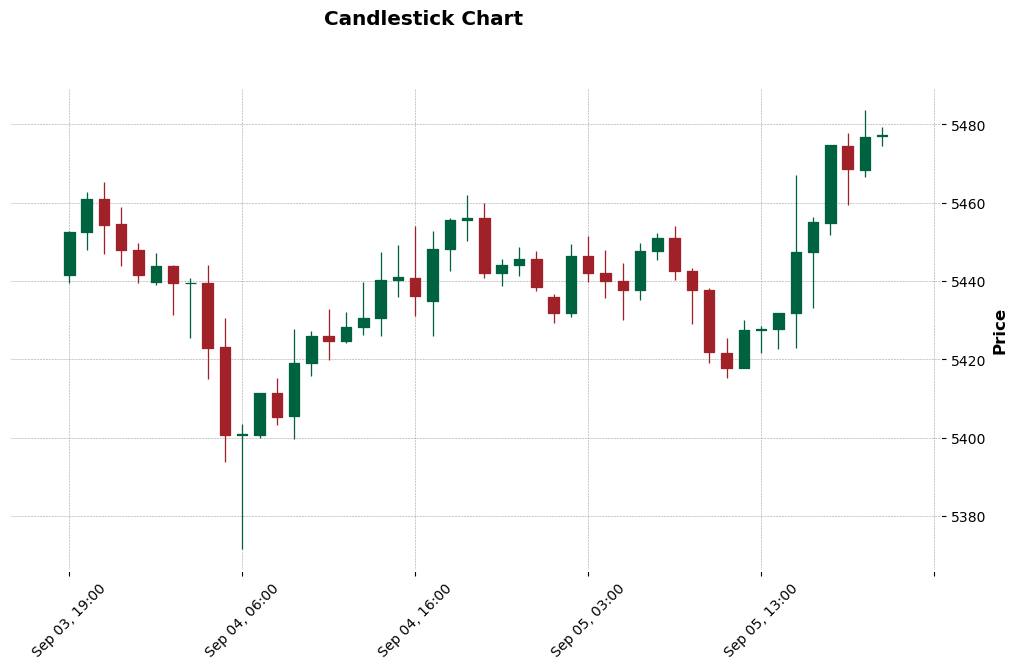

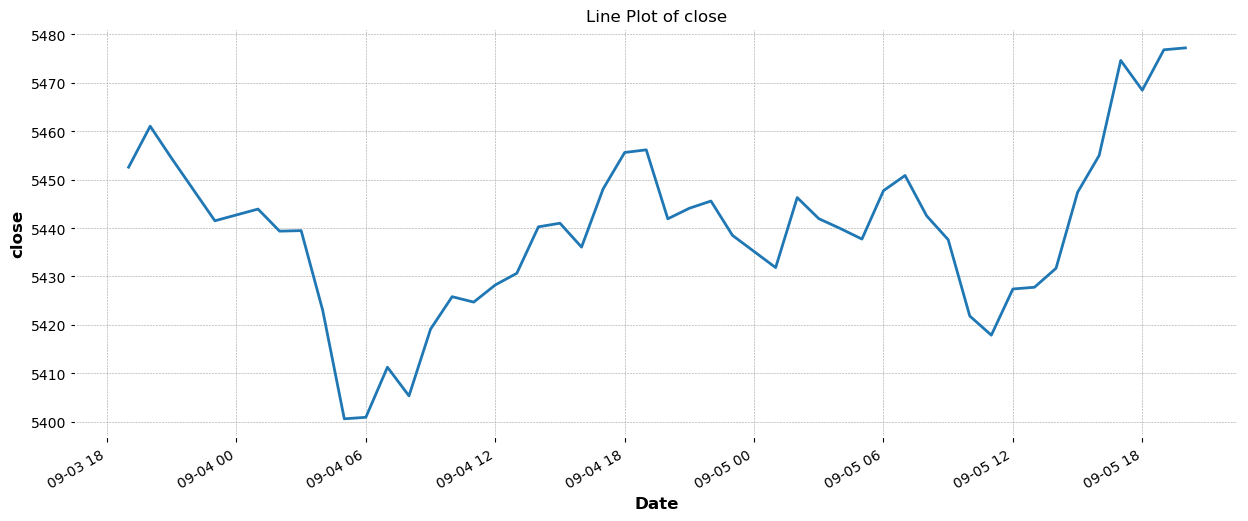

DATASET SUMMARY
Total Rows: 27621
Total Columns: 6
Date Range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close']
Non Numeric Columns: ['date', 'time']
Missing Values: 0
Duplicates: 0
Columns: Index(['date', 'time', 'open', 'high', 'low', 'close'], dtype='object')
Index Column: datetime


In [3]:
first_look = FirstLook(df = df.data, full_analysis = True, periods = 48, column = 'close')

Data shape: (27621, 6)
Date range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
COMPREHENSIVE EXPLORATORY DATA ANALYSIS
BASIC DATA ANALYSIS
Dataset shape: (27621, 6)
Date range: 2021-01-04 01:00:00 to 2025-09-05 20:00:00
Total periods: 27621
Available OHLC columns: ['open', 'high', 'low', 'close']

Data types:
date      object
time      object
open     float64
high     float64
low      float64
close    float64
dtype: object

Missing values:
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

PRICE TREND ANALYSIS (CLOSE)
Mean price: 3180.7492
Median price: 2900.0100
Standard deviation: 866.0451
Minimum price: 2190.9600
Maximum price: 5477.2300

Average daily return: 0.0030%
Return volatility: 0.1844%
Maximum daily gain: 2.0100%
Maximum daily loss: -3.9583%
Error in plotting price trend analysis: local variable 'current_trend' referenced before assignment

Current trend (20 vs 50 MA): Uptrend
Bullish crossovers (20MA > 50MA): 322
Bearish crossovers (20MA < 50MA)

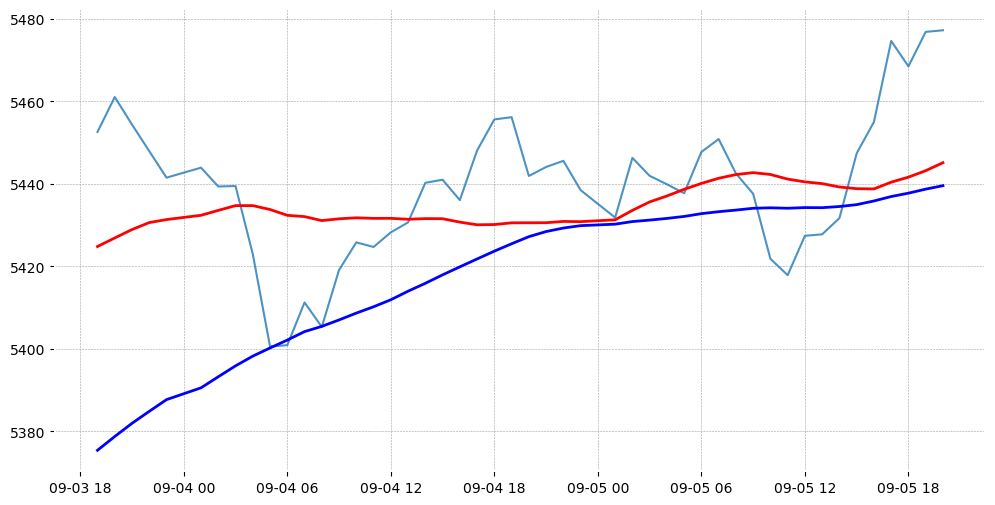

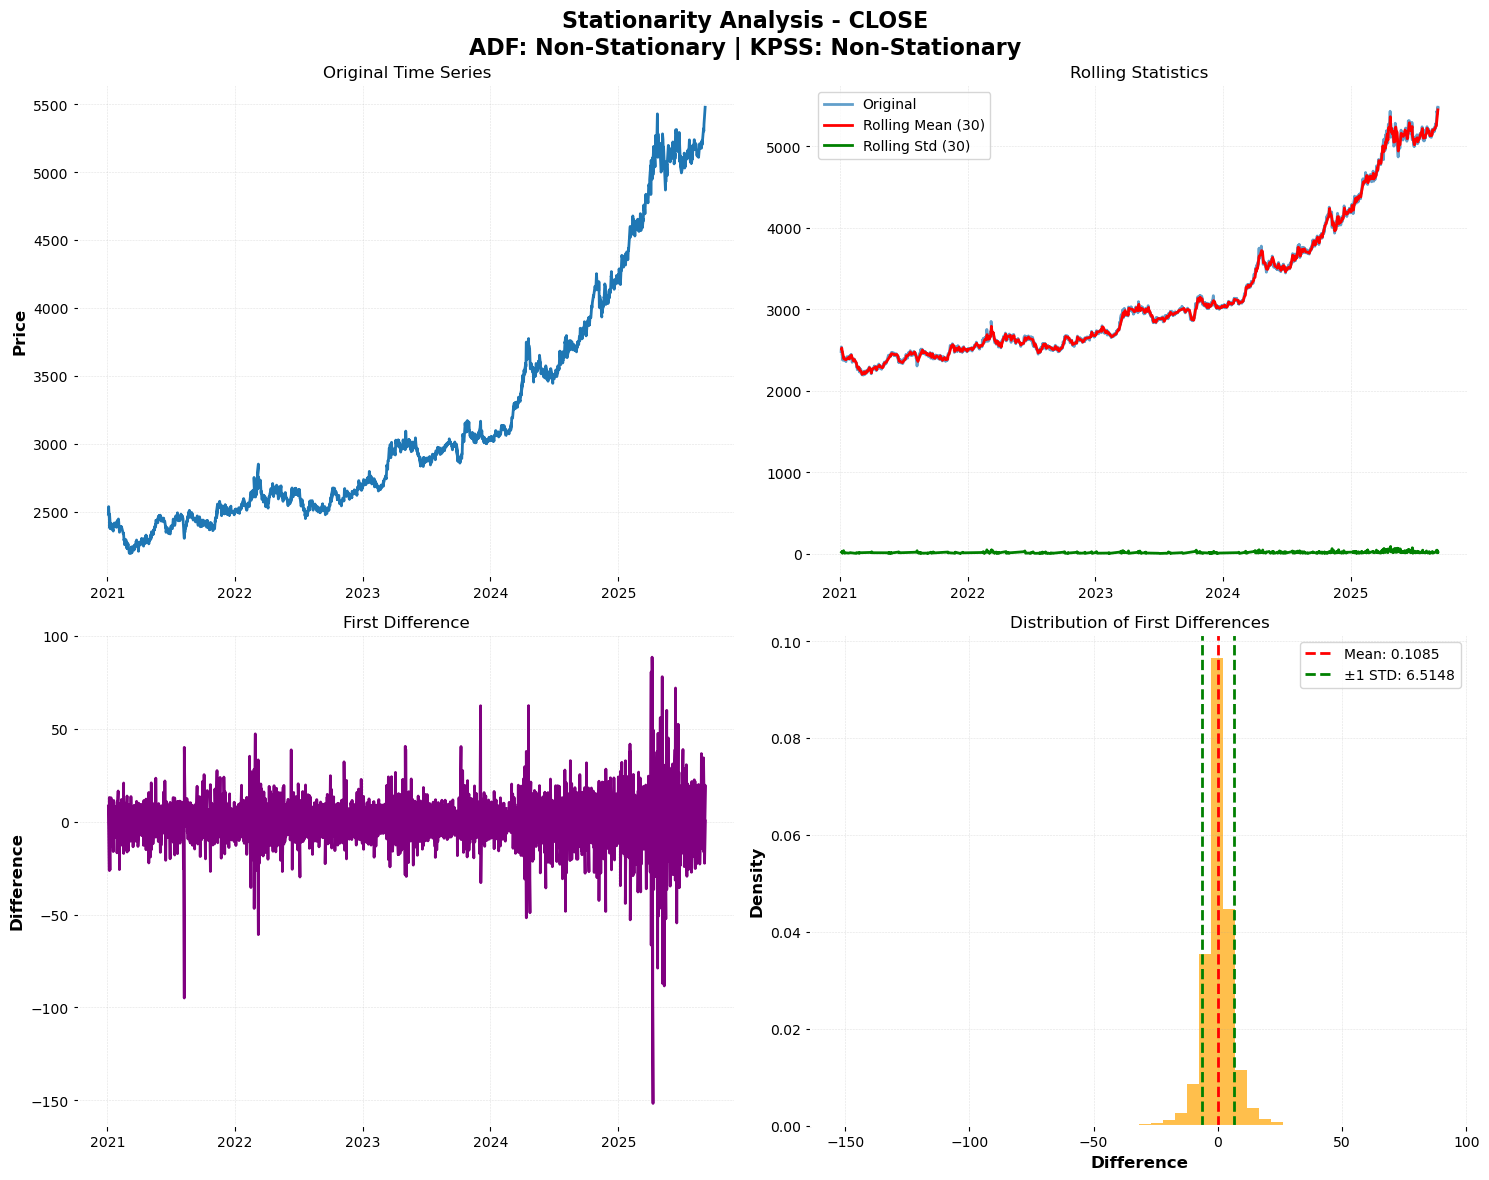


DISTRIBUTION ANALYSIS (CLOSE)


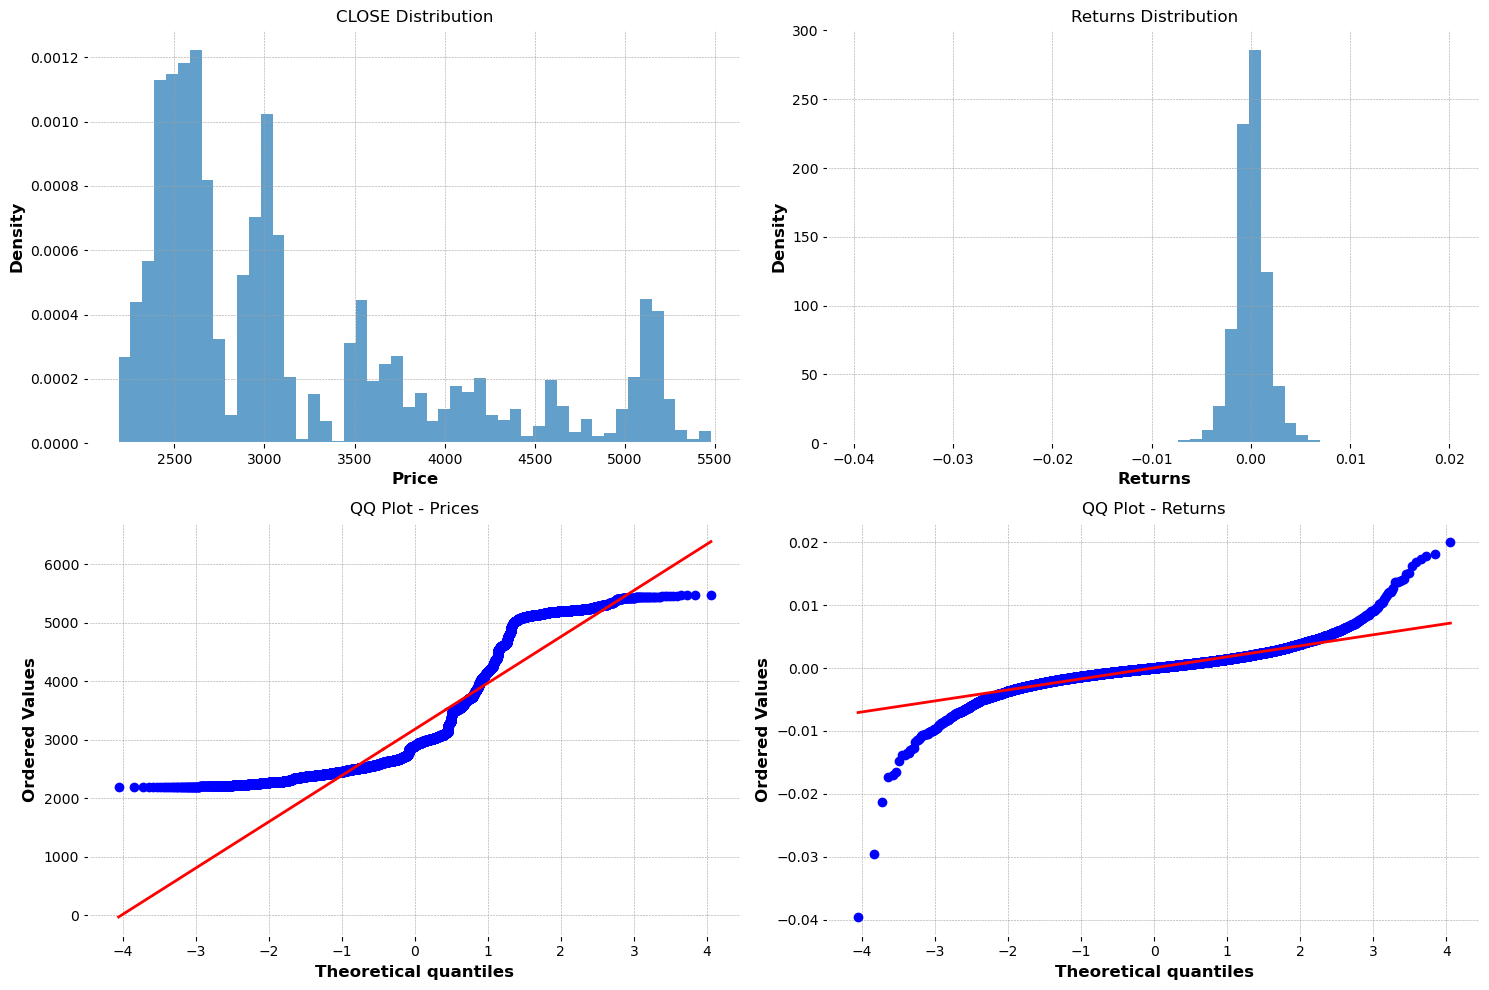

Normality Tests for Returns:
D'Agostino's K^2 Test: statistic=7491.1624, p-value=0.0000
Shapiro-Wilk Test: statistic=0.9041, p-value=0.0000

VOLATILITY ANALYSIS (CLOSE)


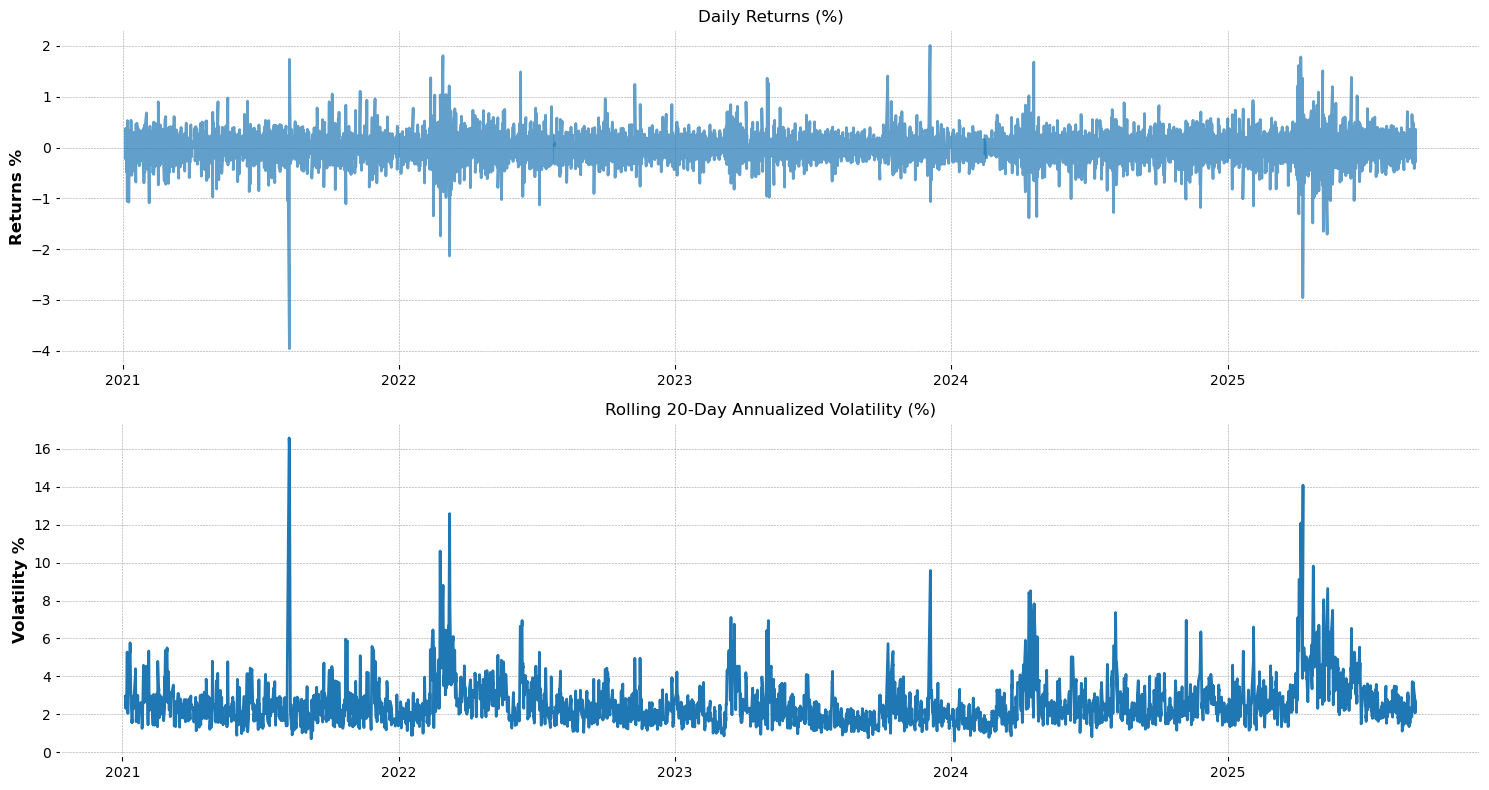

Average volatility: 2.66%
Maximum volatility: 16.57%
Minimum volatility: 0.59%

CORRELATION ANALYSIS


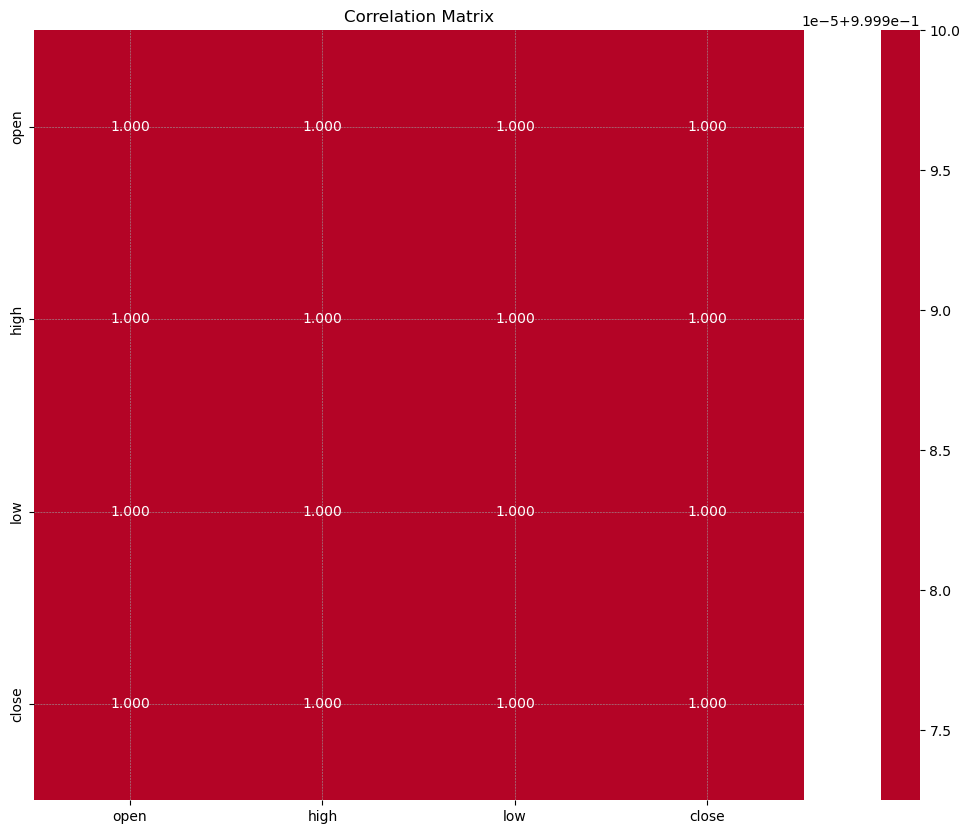

Strongest correlations:
open - high: 1.000
open - low: 1.000
open - close: 1.000
high - low: 1.000
high - close: 1.000
low - close: 1.000

AUTOCORRELATION ANALYSIS (CLOSE)


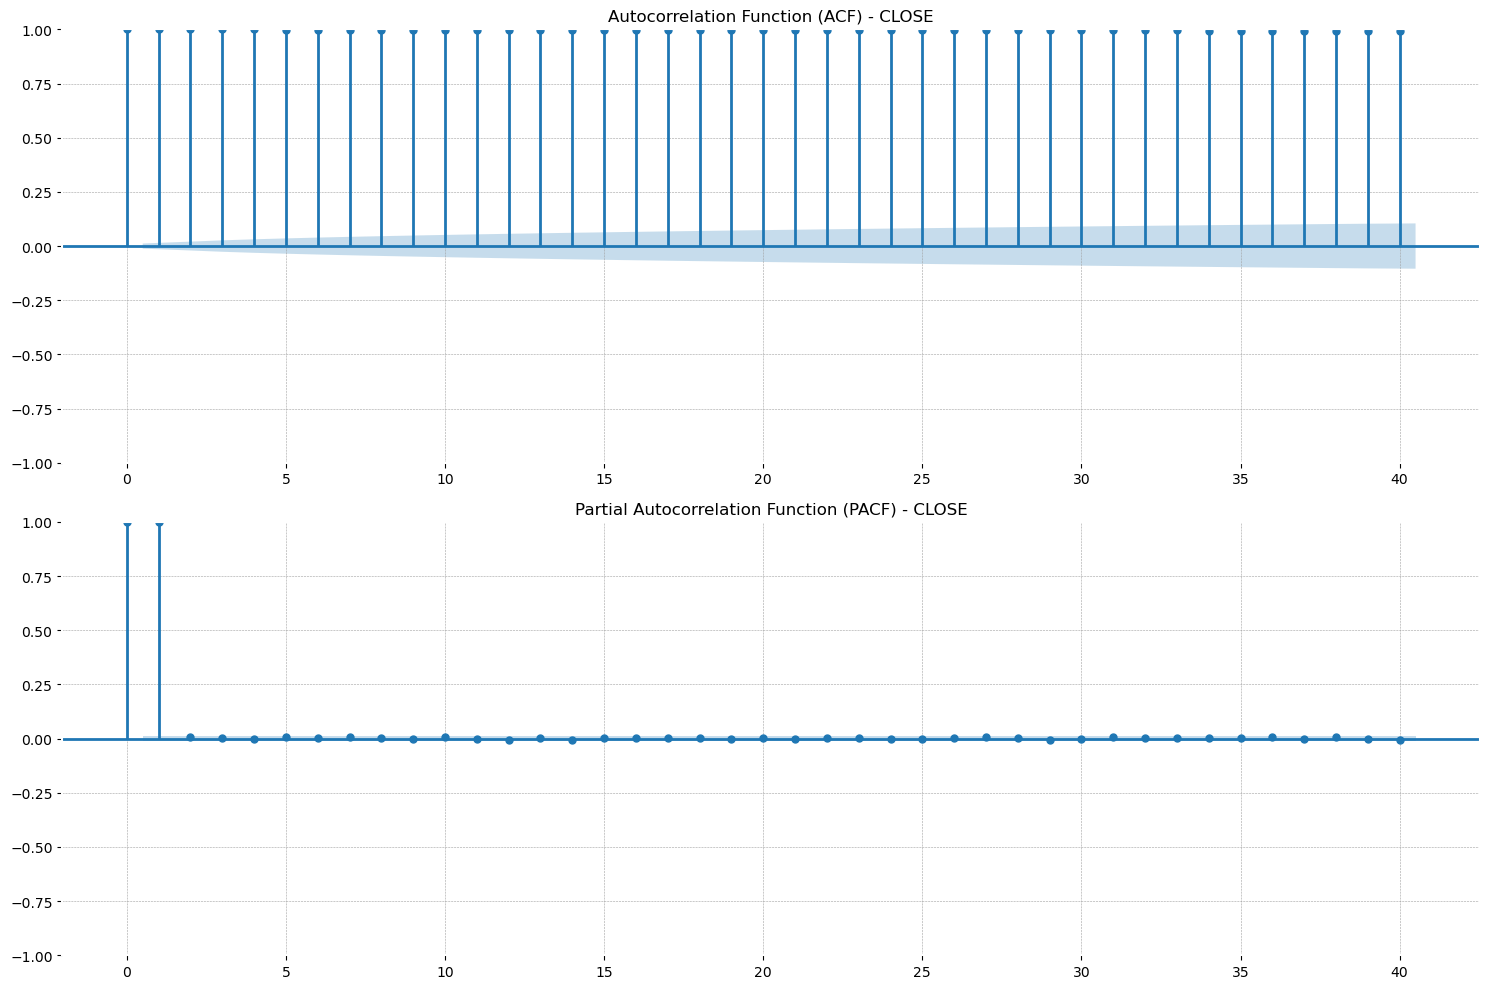


SEASONAL DECOMPOSITION (CLOSE)


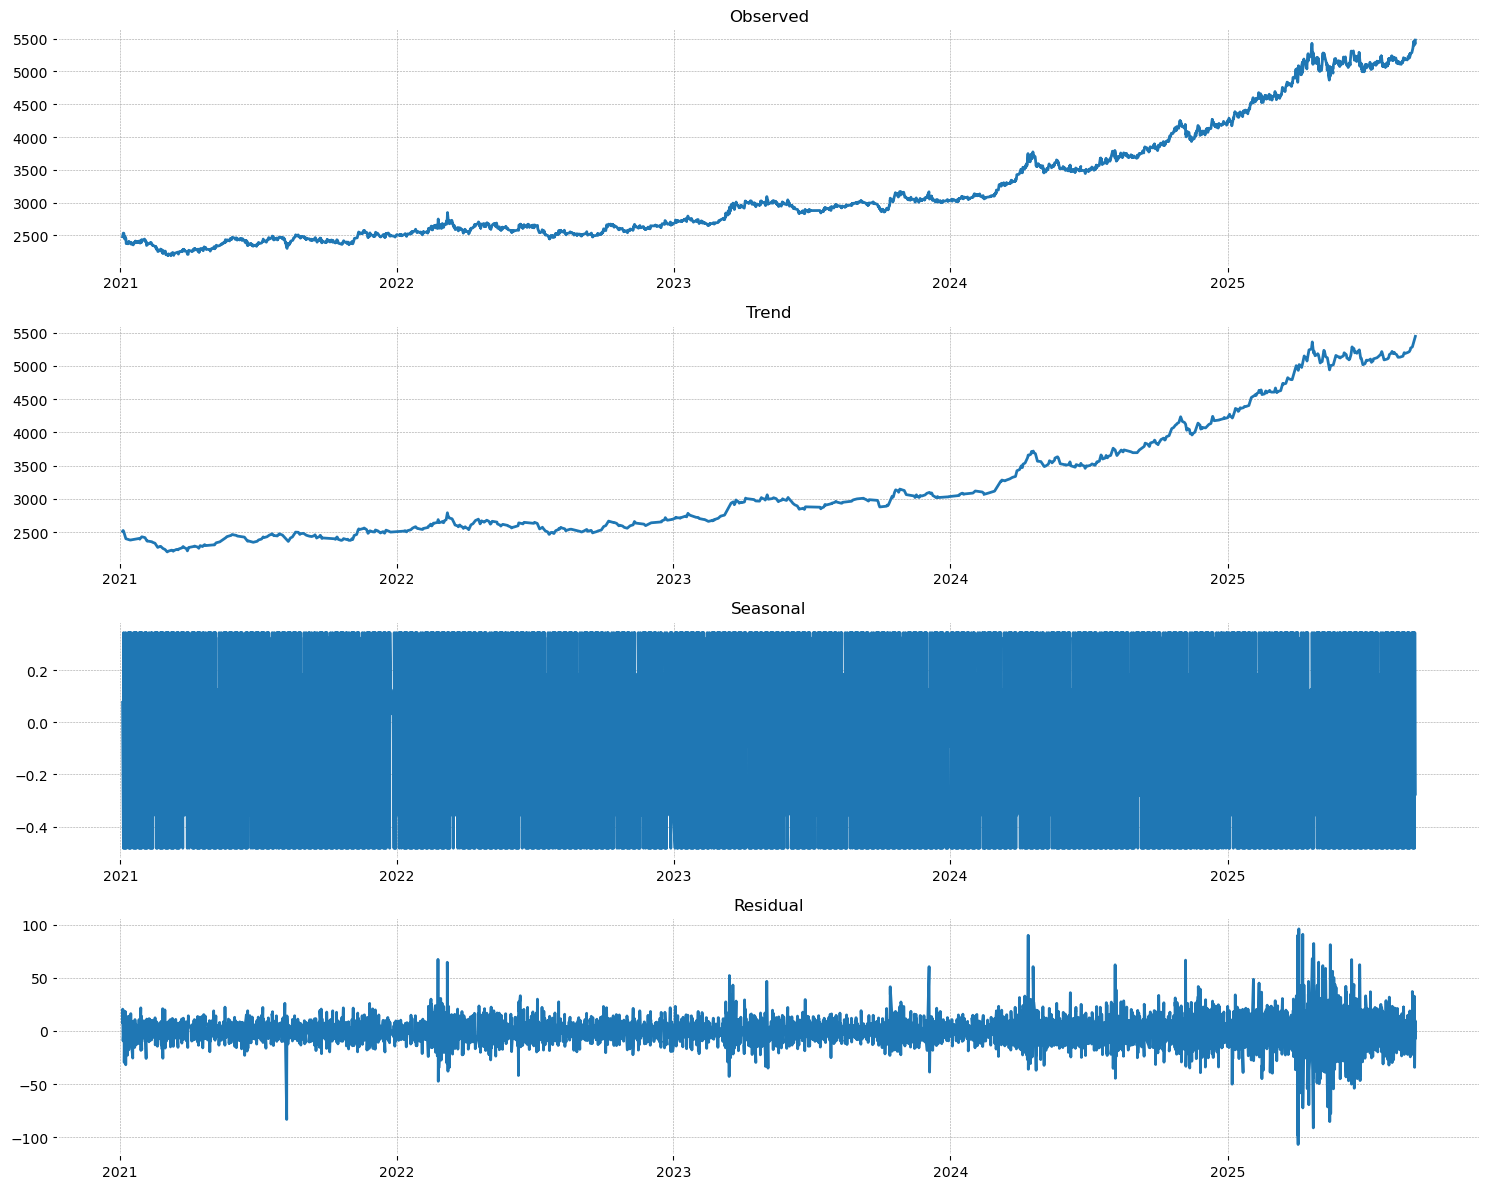


COMPREHENSIVE EDA SUMMARY
{'average_volatility': 2.655862322249132, 'max_volatility': 16.5698827025146, 'min_volatility': 0.5892866612512924}
{'open-high': 0.9999857257649455, 'open-low': 0.9999838424518227, 'open-close': 0.9999725028430178, 'high-low': 0.9999762581122186, 'high-close': 0.9999859720670566, 'low-close': 0.9999863958158842}
{'dagostino_statistic': 0.9040987506104826, 'dagostino_p_value': 7.907990869373583e-83, 'shapiro_statistic': 0.9040987506104826, 'shapiro_p_value': 7.907990869373583e-83}
{'acf_values': 0.9999717103757664, 'pacf_values': 0.9999717103757664}
{'adf_statistic': 2.330533713135913, 'adf_p_value': 0.9989737728595938, 'kpss_statistic': 23.583941895565534, 'kpss_p_value': 0.01, 'adf_stationary': False, 'kpss_stationary': False}
{'current_trend': 'Uptrend', 'bullish_crossovers': 322, 'bearish_crossovers': 322, 'most_recent_crossover': 'None'}
{'open-high': 0.9999857257649455, 'open-low': 0.9999838424518227, 'open-close': 0.9999725028430178, 'high-low': 0.9999

In [4]:
eda = ForexEDA(df = first_look.data, full_analysis = True)

In [5]:
eda.data.isnull().sum()

date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

In [6]:
df_with_indicators = TechnicalIndicators(eda.data, calulate_all = True)

Data loaded successfully!
Shape: (27621, 6)

CALCULATING ALL TECHNICAL INDICATORS WITH TA-LIB
CALCULATING MOVING AVERAGES WITH TA-LIB
 Calculated SMA_5 and EMA_5
 Calculated SMA_10 and EMA_10
 Calculated SMA_20 and EMA_20
 Calculated SMA_50 and EMA_50
 Calculated SMA_200 and EMA_200

CALCULATING RSI (14) WITH TA-LIB
 RSI_14 calculated

CALCULATING MACD (12, 26, 9) WITH TA-LIB
 MACD, Signal Line, and Histogram calculated

CALCULATING BOLLINGER BANDS (20, 2σ) WITH TA-LIB
 Bollinger Bands calculated

CALCULATING STOCHASTIC OSCILLATOR (14, 3) WITH TA-LIB
 Stochastic Oscillator calculated

CALCULATING AVERAGE TRUE RANGE (14) WITH TA-LIB
 Average True Range calculated

CALCULATING ADX (14) WITH TA-LIB
 ADX calculated

CALCULATING LAGGED FEATURES (5 lags)
 Created Close_Lag_1
 Created Close_Lag_2
 Created Close_Lag_3
 Created Close_Lag_4
 Created Close_Lag_5
 Created Return_Lag_1
 Created Return_Lag_2
 Created Return_Lag_3
 Created Return_Lag_4
 Created Return_Lag_5
